In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

city_data = city_data.set_index('city').join(ride_data.groupby(['city']).mean()['fare'])
city_data = city_data.join(ride_data.groupby('city').count()['date'])
city_data= city_data.rename(columns={'fare':'avg_fare', 'date':'total_rides'})
city_data['type'] = pd.Categorical(city_data['type'])

city_data['total_rides']=city_data['total_rides']*3

city_data['code']=city_data.type.cat.codes

colors = []

city_data.head()

,driver_count,type,avg_fare,total_rides,code
city,,,,,
Richardfort,38,Urban,22.373214,84,2
Williamsstad,59,Urban,24.362174,69,2
Port Angela,67,Urban,23.836842,57,2
Rodneyfort,34,Urban,28.616957,69,2
West Robert,39,Urban,25.123871,93,2


In [2]:
for row in city_data['code']:
    if row == 0: #rural
        colors.append('r')

    elif row == 1: #suburban
        colors.append('g')
    else: #urban
        colors.append('b')

## Bubble Plot of Ride Sharing Data

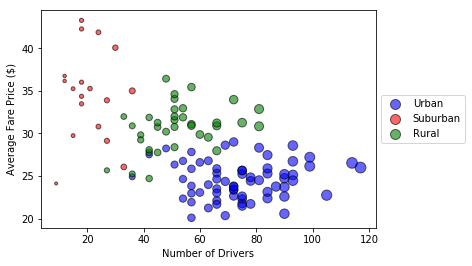

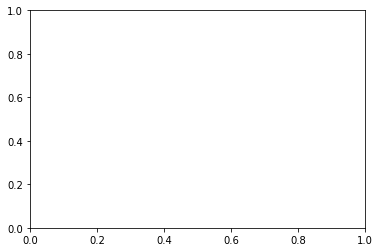

In [8]:
fig, ax = plt.subplots()
x = ax.scatter('total_rides','avg_fare',s= 'total_rides',c= colors,data = city_data,alpha=0.6,edgecolors='black')
plt.xlabel('Number of Drivers')
plt.ylabel('Average Fare Price ($)')
circles=[plt.Line2D(range(1), range(1), color='w', marker='o', markersize=10, markerfacecolor=item,alpha =0.6, mec='black',mew=1) for item in ['b','r','g']]
leg = plt.legend(circles, ['Urban','Suburban','Rural'], loc = "center left", bbox_to_anchor = (1, 0.5), numpoints = 1)

fig1, ax1 = plt.subplots()
city_data['total_fare']=city_data["avg_fare"]*city_data['total_rides']
city_total_data = city_data.groupby('type').sum()["total_fare"]
city_total_data/=city_total_data.sum()
plt.show()

## Total Fares by City Type

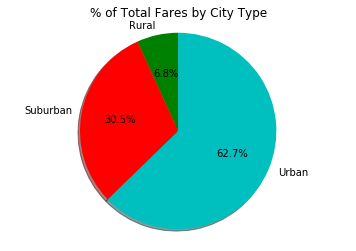

In [4]:
fig1, ax1 = plt.subplots()
city_data['total_fare']=city_data["avg_fare"]*city_data['total_rides']
city_total_data = city_data.groupby('type').sum()["total_fare"]
city_total_data/=city_total_data.sum()

ax1.pie(city_total_data,colors=['g','r','c'],labels = city_total_data.index,autopct='%1.1f%%',startangle=90,shadow=True)
ax1.axis('equal') 
plt.title('% of Total Fares by City Type')
plt.savefig('filename.png')
plt.show()

## Total Rides by City Type

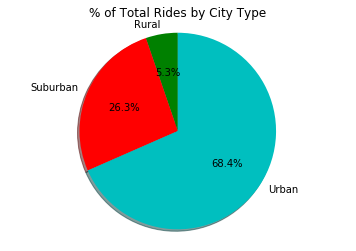

In [5]:
fig1, ax1 = plt.subplots()
city_total_data = city_data.groupby('type').sum()["total_rides"]
city_total_data/=city_total_data.sum()

ax1.pie(city_total_data,colors=['g','r','c'],labels = city_total_data.index,autopct='%1.1f%%',startangle=90,shadow=True)
ax1.axis('equal') 
plt.title('% of Total Rides by City Type')
plt.show()

## Total Drivers by City Type

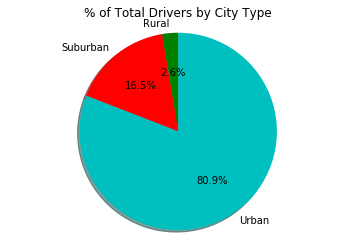

In [6]:
fig1, ax1 = plt.subplots()
city_total_data = city_data.groupby('type').sum()["driver_count"]
city_total_data/=city_total_data.sum()

ax1.pie(city_total_data,colors=['g','r','c'],labels = city_total_data.index,autopct='%1.1f%%',startangle=90,shadow=True)
ax1.axis('equal') 
plt.title('% of Total Drivers by City Type')
plt.show()